In [68]:
import numpy as np
import matplotlib.pyplot as plt




temps = np.array([
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
    10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
    20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
    30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
    40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
    50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
    60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
    70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
    80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
    90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
    100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
    110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
    120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
    130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
    140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
    150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
    160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
    170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
    180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
    190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
    200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
    210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
    220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
    230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
    240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
    250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
    260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
    270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
    280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
    290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
    300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
    310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
    320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
    330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
    340, 341, 342, 343, 344, 345, 346, 347, 348, 349,
    350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
    360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
    370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
    380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
    390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
    400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
    410, 411, 412, 413, 414, 415, 416, 417, 418, 419,
    420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
    430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
    440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
    450, 451, 452, 453, 454, 455, 456, 457, 458, 459,
    460, 461, 462, 463, 464, 465, 466, 467, 468, 469,
    470, 471, 472, 473, 474, 475, 476, 477, 478, 479,
    480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
    490, 491, 492, 493, 494, 495, 496, 497, 498, 499,
    500, 501, 502, 503, 504, 505, 506, 507, 508, 509,
    510, 511, 512, 513, 514, 515, 516, 517, 518, 519,
    520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
    530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
    540, 541, 542, 543, 544, 545, 546, 547, 548, 549,
    550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
    560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
    570, 571, 572, 573, 574, 575, 576, 577, 578, 579,
    580, 581, 582, 583, 584, 585, 586, 587, 588, 589,
    590, 591, 592, 593, 594, 595, 596, 597, 598, 599,
    600, 601, 602, 603, 604, 605, 606, 607, 608, 609,
    610, 611, 612, 613, 614, 615, 616, 617, 618, 619,
    620, 621, 622, 623, 624, 625, 626, 627, 628, 629,
    630, 631
])

position = np.array([
    0.0,
    0.153999999165534,
    1.11940014362335,
    3.23640036582946,
    6.51340150833129,
    10.9504041671752,
    16.5474090576171,
    23.3044166564941,
    31.2214241027832,
    40.2984237670898,
    50.4814147949218,
    60.3124084472656,
    69.1433944702148,
    77.4739074707031,
    85.8099365234375,
    94.1459655761718,
    102.493980407714,
    111.223960876464,
    120.980934143066,
    131.89517211914,
    143.809036254882,
    156.398071289062,
    169.431518554687,
    182.757385253906,
    196.275741577148,
    209.920761108398,
    223.649124145507,
    237.432373046875,
    251.251770019531,
    265.094909667968,
    278.953704833984,
    292.822784423828,
    306.698638916015,
    320.578979492187,
    334.462219238281,
    348.347351074218,
    362.233795166015,
    375.820861816406,
    388.432922363281,
    400.045043945312,
    410.657104492187,
    420.26919555664,
    428.881286621093,
    436.49331665039,
    443.105407714843,
    448.71743774414,
    453.329528808593,
    456.941589355468,
    459.553619384765,
    461.165710449218,
    461.777740478515,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    461.783325195312,
    463.880218505859,
    464.68521118164,
    466.628265380859,
    469.731231689453,
    473.994232177734,
    479.417266845703,
    486.000213623046,
    493.743286132812,
    502.646179199218,
    512.709289550781,
    523.916687011718,
    536.036987304687,
    548.761779785156,
    561.884582519531,
    575.269409179687,
    588.826416015625,
    602.497009277343,
    616.242248535156,
    630.036560058593,
    643.863342285156,
    657.711181640625,
    671.573181152343,
    685.4443359375,
    699.321533203125,
    713.202697753906,
    727.086486816406,
    740.972045898437,
    754.858764648437,
    768.746337890625,
    782.158996582031,
    794.571716308593,
    805.984558105468,
    816.397338867187,
    825.81005859375,
    834.301147460937,
    842.690307617187,
    851.640930175781,
    861.695678710937,
    872.895141601562,
    885.010192871093,
    897.731628417968,
    910.852172851562,
    924.235290527343,
    937.791320800781,
    951.461181640625,
    965.205993652343,
    979.000061035156,
    992.826538085937,
    1006.67431640625,
    1020.53625488281,
    1034.40734863281,
    1048.28454589843,
    1062.16564941406,
    1076.04956054687,
    1089.93518066406,
    1103.82189941406,
    1117.70861816406,
    1131.59655761718,
    1145.48571777343,
    1159.14672851562,
    1171.8603515625,
    1183.57385253906,
    1194.28735351562,
    1204.00073242187,
    1212.71411132812,
    1220.427734375,
    1227.14111328125,
    1232.8544921875,
    1237.56774902343,
    1241.28112792968,
    1243.99462890625,
    1245.7080078125,
    1246.42138671875,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.44348144531,
    1246.5974814444755,
    1247.5628815889334,
    1249.6798818111395,
    1252.9568829536413,
    1257.3938856124853,
    1262.9908905029272,
    1269.7478981018041,
    1277.6649055480932,
    1286.7419052123998,
    1296.9248962402319,
    1306.7558898925756,
    1315.5868759155248,
    1323.9173889160131,
    1332.2534179687475,
    1340.5894470214819,
    1348.937461853024,
    1357.667442321774,
    1367.424415588376,
    1378.33865356445,
    1390.252517700192,
    1402.841552734372,
    1415.874999999997,
    1429.200866699216,
    1442.719223022458,
    1456.364242553708,
    1470.092605590817,
    1483.875854492185,
    1497.695251464841,
    1511.538391113278,
    1525.397186279294,
    1539.266265869138,
    1553.142120361325,
    1567.022460937497,
    1580.905700683591,
    1594.790832519528,
    1608.677276611325,
    1622.264343261716,
    1634.876403808591,
    1646.488525390622,
    1657.100585937497,
    1666.71267700195,
    1675.324768066403,
    1682.9367980957,
    1689.548889160153,
    1695.16091918945,
    1699.773010253903,
    1703.385070800778,
    1705.997100830075,
    1707.609191894528,
    1708.221221923825,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1708.226806640622,
    1710.323699951169,
    1711.12869262695,
    1713.071746826169,
    1716.174713134763,
    1720.437713623044,
    1725.860748291013,
    1732.443695068356,
    1740.186767578122,
    1749.089660644528,
    1759.152770996091,
    1770.360168457028,
    1782.480468749997,
    1795.205261230466,
    1808.328063964841,
    1821.712890624997,
    1835.269897460935,
    1848.940490722653,
    1862.685729980466,
    1876.480041503903,
    1890.306823730466,
    1904.154663085935,
    1918.016662597653,
    1931.88781738281,
    1945.765014648435,
    1959.646179199216,
    1973.529968261716,
    1987.415527343747,
    2001.302246093747,
    2015.189819335935,
    2028.602478027341,
    2041.015197753903,
    2052.428039550778,
    2062.8408203124973,
    2072.2535400390598,
    2080.7446289062473,
    2089.1337890624973,
    2098.084411621091,
    2108.1391601562473,
    2119.3386230468723,
    2131.453674316403,
    2144.175109863278,
    2157.2956542968723,
    2170.678771972653,
    2184.234802246091,
    2197.9046630859348,
    2211.649475097653,
    2225.443542480466,
    2239.2700195312473,
    2253.1177978515598,
    2266.97973632812,
    2280.85083007812,
    2294.72802734374,
    2308.60913085937,
    2322.49304199218,
    2336.37866210937,
    2350.26538085937,
    2364.15209960937,
    2378.04003906249,
    2391.92919921874,
    2405.59020996093,
    2418.3038330078098,
    2430.01733398437,
    2440.73083496093,
    2450.44421386718,
    2459.15759277343,
    2466.8712158203098,
    2473.5845947265598,
    2479.2979736328098,
    2484.01123046874,
    2487.72460937499,
    2490.4381103515598,
    2492.1514892578098,
    2492.8648681640598,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2492.88696289062,
    2493.0409628897855,
    2494.0063630342433,
    2496.1233632564495,
    2499.4003643989513,
    2503.8373670577953,
    2509.434371948237,
    2516.191379547114,
    2524.108386993403,
    2533.18538665771,
    2543.368377685542,
    2553.1993713378856,
    2562.030357360835,
    2570.360870361323,
    2578.6968994140575,
    2587.032928466792,
    2595.380943298334,
    2604.110923767084,
    2613.867897033686,
    2624.78213500976,
    2636.695999145502,
    2649.285034179682,
    2662.318481445307,
    2675.644348144526,
    2689.162704467768,
    2702.807723999018,
    2716.536087036127,
    2730.319335937495,
    2744.138732910151,
    2757.981872558588,
    2771.840667724604,
    2785.709747314448,
    2799.585601806635,
    2813.465942382807,
    2827.349182128901,
    2841.234313964838,
    2855.120758056635,
    2868.707824707026,
    2881.319885253901,
    2892.932006835932,
    2903.544067382807,
    2913.15615844726,
    2921.768249511713,
    2929.38027954101,
    2935.992370605463,
    2941.60440063476,
    2946.216491699213,
    2949.828552246088,
    2952.440582275385,
    2954.052673339838,
    2954.664703369135,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2954.670288085932,
    2956.767181396479,
    2957.57217407226,
    2959.515228271479,
    2962.618194580073,
    2966.881195068354,
    2972.304229736323,
    2978.887176513666,
    2986.630249023432,
    2995.533142089838,
    3005.596252441401,
    3016.803649902338,
    3028.923950195307,
    3041.648742675776,
    3054.771545410151,
    3068.156372070307,
    3081.713378906245,
    3095.383972167963,
    3109.129211425776,
    3122.923522949213,
    3136.750305175776,
    3150.598144531245,
    3164.460144042963,
    3178.33129882812,
    3192.208496093745,
    3206.089660644526,
    3219.973449707026,
    3233.859008789057,
    3247.745727539057,
    3261.633300781245,
    3275.045959472651,
    3287.458679199213,
    3298.871520996088,
    3309.284301757807,
    3318.69702148437,
    3327.188110351557,
    3335.577270507807,
    3344.527893066401,
    3354.582641601557,
    3365.782104492182,
    3377.897155761713,
    3390.618591308588,
    3403.739135742182,
    3417.122253417963,
    3430.678283691401,
    3444.348144531245,
    3458.092956542963,
    3471.887023925776,
    3485.713500976557,
    3499.56127929687,
    3513.42321777343,
    3527.29431152343,
    3541.1715087890498,
    3555.05261230468,
    3568.93652343749,
    3582.82214355468,
    3596.70886230468,
    3610.59558105468,
    3624.4835205077998,
    3638.3726806640498,
    3652.03369140624,
    3664.74731445312,
    3676.46081542968,
    3687.17431640624,
    3696.88769531249,
    3705.60107421874,
    3713.31469726562,
    3720.02807617187,
    3725.74145507812,
    3730.4547119140498,
    3734.1680908202998,
    3736.88159179687,
    3738.59497070312,
    3739.30834960937,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.33044433593,
    3739.4844443350958,
    3740.4498444795536,
    3742.5668447017597,
    3745.8438458442615,
    3750.2808485031055,
    3755.8778533935474,
    3762.6348609924244,
    3770.5518684387134,
    3779.62886810302,
    3789.811859130852,
    3799.642852783196,
    3808.473838806145,
    3816.8043518066333,
    3825.1403808593677,
    3833.476409912102,
    3841.824424743644,
    3850.554405212394,
    3860.3113784789957,
    3871.22561645507,
    3883.139480590812,
    3895.728515624992,
    3908.761962890617,
    3922.087829589836,
    3935.6061859130778,
    3949.2512054443278,
    3962.979568481437,
    3976.762817382805,
    3990.582214355461,
    4004.425354003898,
    4018.2841491699137,
    4032.153228759758,
    4046.029083251945,
    4059.909423828117,
    4073.792663574211,
    4087.677795410148,
    4101.564239501945,
    4115.1513061523365,
    4127.7633666992115,
    4139.375488281242,
    4149.987548828117,
    4159.59963989257,
    4168.211730957023,
    4175.82376098632,
    4182.435852050773,
    4188.04788208007,
    4192.659973144523,
    4196.272033691398,
    4198.884063720695,
    4200.496154785148,
    4201.108184814445,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4201.113769531242,
    4203.210662841789,
    4204.01565551757,
    4205.958709716789,
    4209.061676025383,
    4213.324676513664,
    4218.747711181633,
    4225.330657958976,
    4233.073730468742,
    4241.976623535148,
    4252.0397338867115,
    4263.247131347648,
    4275.367431640617,
    4288.0922241210865,
    4301.2150268554615,
    4314.599853515617,
    4328.156860351555,
    4341.827453613273,
    4355.5726928710865,
    4369.367004394523,
    4383.1937866210865,
    4397.041625976555,
    4410.903625488273,
    4424.77478027343,
    4438.651977539055,
    4452.5331420898365,
    4466.4169311523365,
    4480.302490234367,
    4494.189208984367,
    4508.076782226555,
    4521.4894409179615,
    4533.902160644523,
    4545.315002441398,
    4555.727783203118,
    4565.14050292968,
    4573.631591796868,
    4582.020751953118,
    4590.9713745117115,
    4601.026123046868,
    4612.225585937493,
    4624.340637207023,
    4637.062072753898,
    4650.182617187493,
    4663.565734863273,
    4677.1217651367115,
    4690.791625976555,
    4704.536437988273,
    4718.3305053710865,
    4732.156982421868,
    4746.00476074218,
    4759.86669921874,
    4773.73779296874,
    4787.61499023436,
    4801.49609374999,
    4815.3800048828,
    4829.26562499999,
    4843.15234374999,
    4857.03906249999,
    4870.92700195311,
    4884.81616210936,
    4898.47717285155,
    4911.19079589843,
    4922.90429687499,
    4933.61779785155,
    4943.3311767578,
    4952.04455566405,
    4959.75817871093,
    4966.47155761718,
    4972.18493652343,
    4976.89819335936,
    4980.61157226561,
    4983.32507324218,
    4985.03845214843,
    4985.75183105468,
    4985.77392578124
])


In [69]:



# --- Données constantes ---
M = 70000  # Masse du train (kg)
g = 9.81  # Accélération gravitationnelle (m/s²)
A0, A1 = 780, 6.4  # Résistance au roulement (N, N/tonne)
B0, B1 = 0, 0.14  # Résistance au vent linéaire (N, N/tonne / km/h)
C0, C1 = 0.3634, 0  # Résistance au vent quadratique (N / (km/h)^2)
eta_motor = 0.8  # Rendement moteur
P_aux = 35000  # Puissance auxiliaire (W)

# Paramètres du réseau
V_sst = 790  # Tension des sous-stations (V)
R_sst = 33e-3  # Résistance interne des sous-stations (ohms)
rho_LAC = 131e-6  # Résistivité de la ligne aérienne de contact (ohm/m)
rho_rail = 18e-6  # Résistivité des rails (ohm/m)

# Données position-temps (exemple à remplacer par vos données réelles)
t = temps
position = position
# Batterie
C_batt = 5e7  # Capacité de la batterie (joules), à ajuster
E_batt = C_batt  # Énergie initiale de la batterie (joules)
P_batt_max = 500e3  # Puissance maximale de charge/décharge (W)

# --- Calcul des grandeurs mécaniques ---
v = np.gradient(position, temps)  # Vitesse (m/s)
a = np.gradient(v, temps)  # Accélération (m/s²)
alpha = 0  # Pente supposée constante (rad)

# Résistance à l'avancement
F_resistive = (A0 + A1 * (M / 1000)) + (B0 + B1 * (M / 1000)) * v + (C0 + C1 * (M / 1000)) * v**2

# Force motrice
F_motrice = M * a + M * g * np.sin(alpha) + F_resistive

# Puissance mécanique
P_mec = F_motrice * v  # En watts

# Puissance totale demandée
P_train = P_mec / eta_motor + P_aux  # En watts



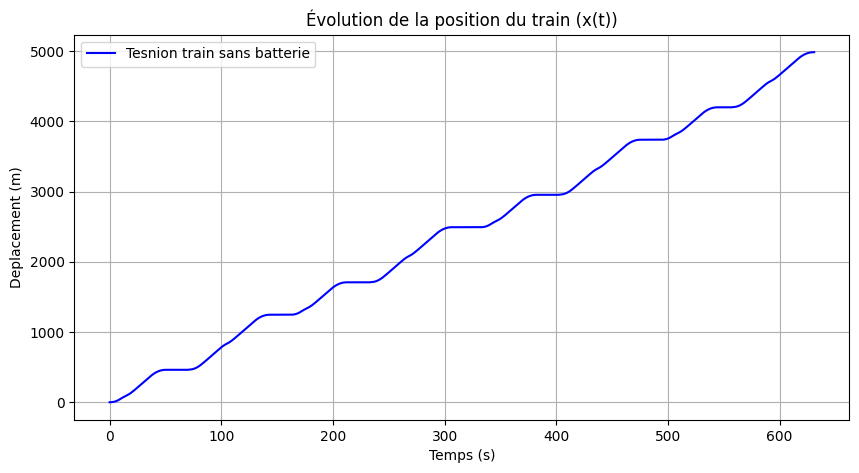

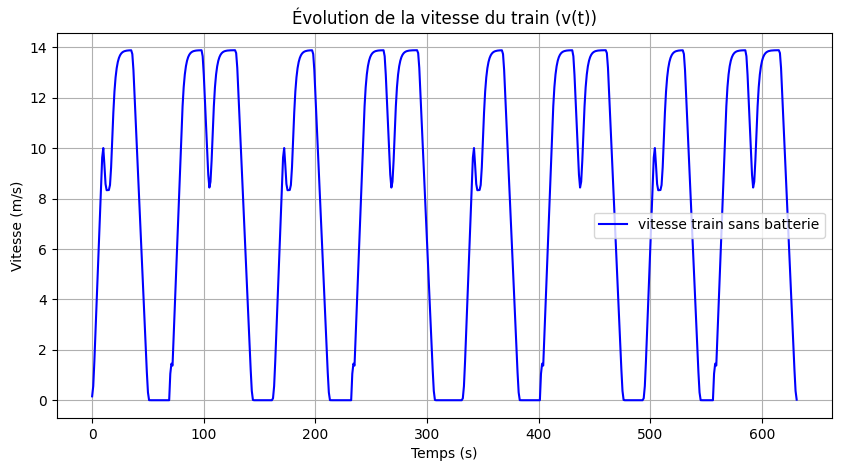

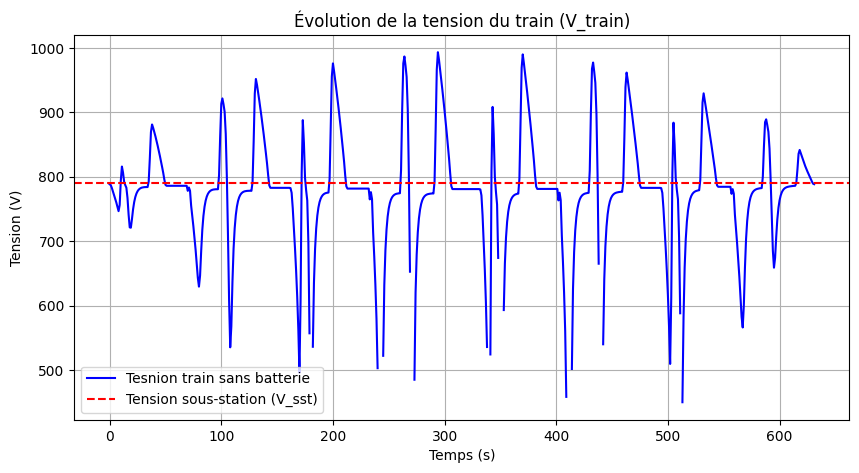

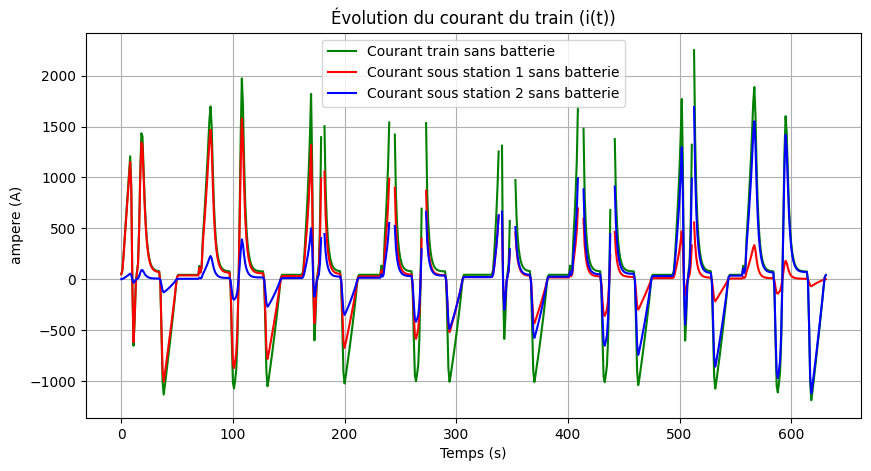

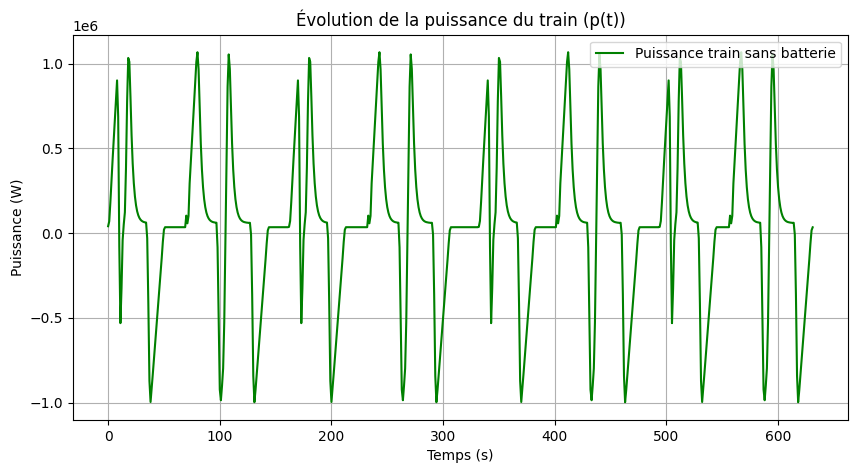

In [70]:
# --- Simulation sans batterie ---
V_train_no_batt = []  
I_train = []
I_1 = []
I_2 = []
Psst_1 = []
Psst_2 = []

for i in range(len(temps)):
    # Résistances des segments de LAC et rail
    R_LAC1 = rho_LAC * position[i]  # Jusqu'au train
    R_LAC2 = rho_LAC * (5000 - position[i])  # Après le train
    R_rail1 = rho_rail * position[i]
    R_rail2 = rho_rail * (5000 - position[i])
    R_eq1=(R_sst + R_LAC1 + R_rail1)
    R_eq2=(R_sst + R_LAC2 + R_rail2)
    # Résistance équivalente (Req)
    R_eq = 1 / (1 / R_eq1 + 1 / R_eq2)
    # Calcul de la tension V_train à partir de l'équation quadratique
    
    delta = V_sst**2 - 4 * R_eq * P_train[i]
    if delta > 0:
        V_train = 0.5 * (V_sst + np.sqrt(delta))
    else:
        V_train = np.nan  # Cas où la tension est impossible
    
    V_train_no_batt.append(V_train)
    
    I_train.append((V_sst-V_train)/R_eq)
    I_1.append((V_sst-V_train)/R_eq*(R_eq2/(R_eq2+R_eq1)))
    I_2.append((V_sst-V_train)/R_eq*(R_eq1/(R_eq2+R_eq1)))
    
I_train=np.array(I_train)
I_1=np.array(I_1)
I_2=np.array(I_2)
# calcule des autres grandeurs:

Psst_1 = I_1 * V_sst
Psst_2 = I_2 * V_sst

# --- Tracé des résultats ---



# position
plt.figure(figsize=(10, 5))
plt.figure(1)
plt.plot(t, position, label="Tesnion train sans batterie", color="blue")
plt.xlabel("Temps (s)")
plt.ylabel("Deplacement (m)")
plt.title("Évolution de la position du train (x(t))")
plt.legend()
plt.grid()

# Vitesse
plt.figure(figsize=(10, 5))
plt.figure(2)
plt.plot(t, v, label="vitesse train sans batterie", color="blue")
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse (m/s)")
plt.title("Évolution de la vitesse du train (v(t))")
plt.legend()
plt.grid()

# Tensions
plt.figure(figsize=(10, 5))
plt.figure(3)
plt.plot(t, V_train_no_batt, label="Tesnion train sans batterie", color="blue")
plt.axhline(V_sst, color="red", linestyle="--", label="Tension sous-station (V_sst)")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension du train (V_train)")
plt.legend()
plt.grid()

# courants
plt.figure(figsize=(10, 5))
plt.figure(4)
plt.plot(t, I_train, label="Courant train sans batterie", color="green")
plt.plot(t, I_1, label="Courant sous station 1 sans batterie", color="red")
plt.plot(t, I_2, label="Courant sous station 2 sans batterie", color="blue")
plt.xlabel("Temps (s)")
plt.ylabel("ampere (A)")
plt.title("Évolution du courant du train (i(t))")
plt.legend()
plt.grid()

# puissances
plt.figure(figsize=(10, 5))
plt.figure(5)
plt.plot(t, P_train, label="Puissance train sans batterie", color="green")
#plt.plot(t, Psst_1, label="Puissance sous station 1 sans batterie", color="red")
#plt.plot(t, Psst_2, label="Puissance sous station 2 sans batterie", color="blue")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (W)")
plt.title("Évolution de la puissance du train (p(t))")
plt.legend()
plt.grid()



<Figure size 640x480 with 0 Axes>

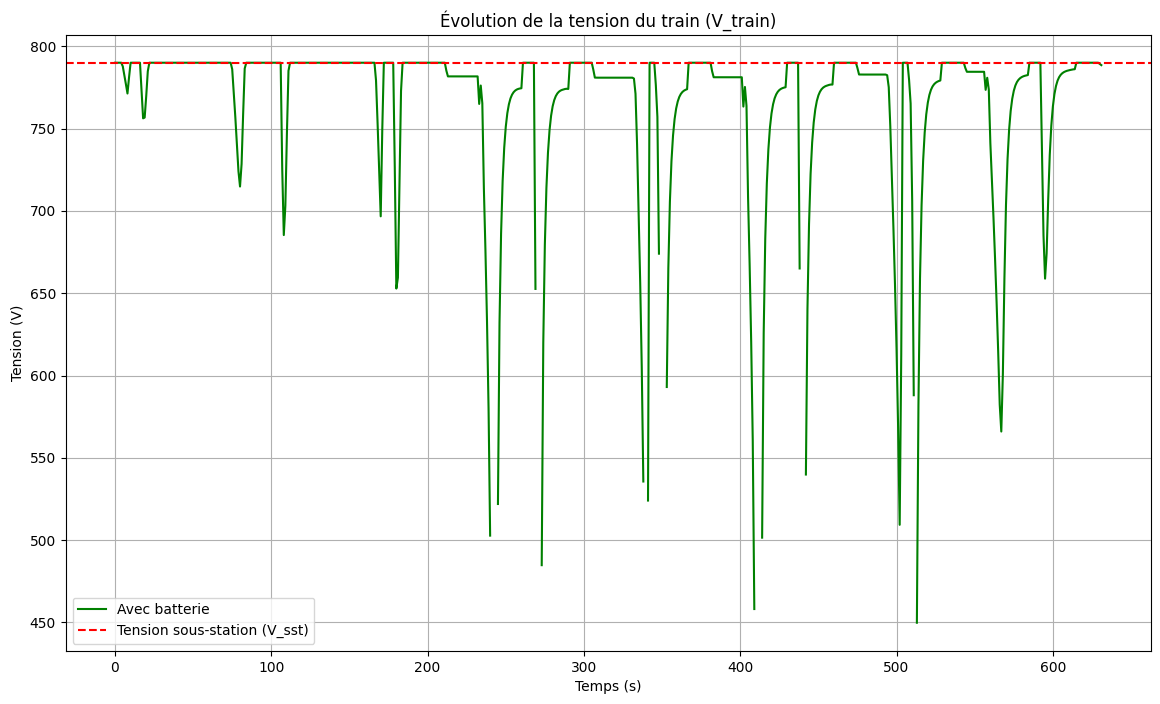

<Figure size 640x480 with 0 Axes>

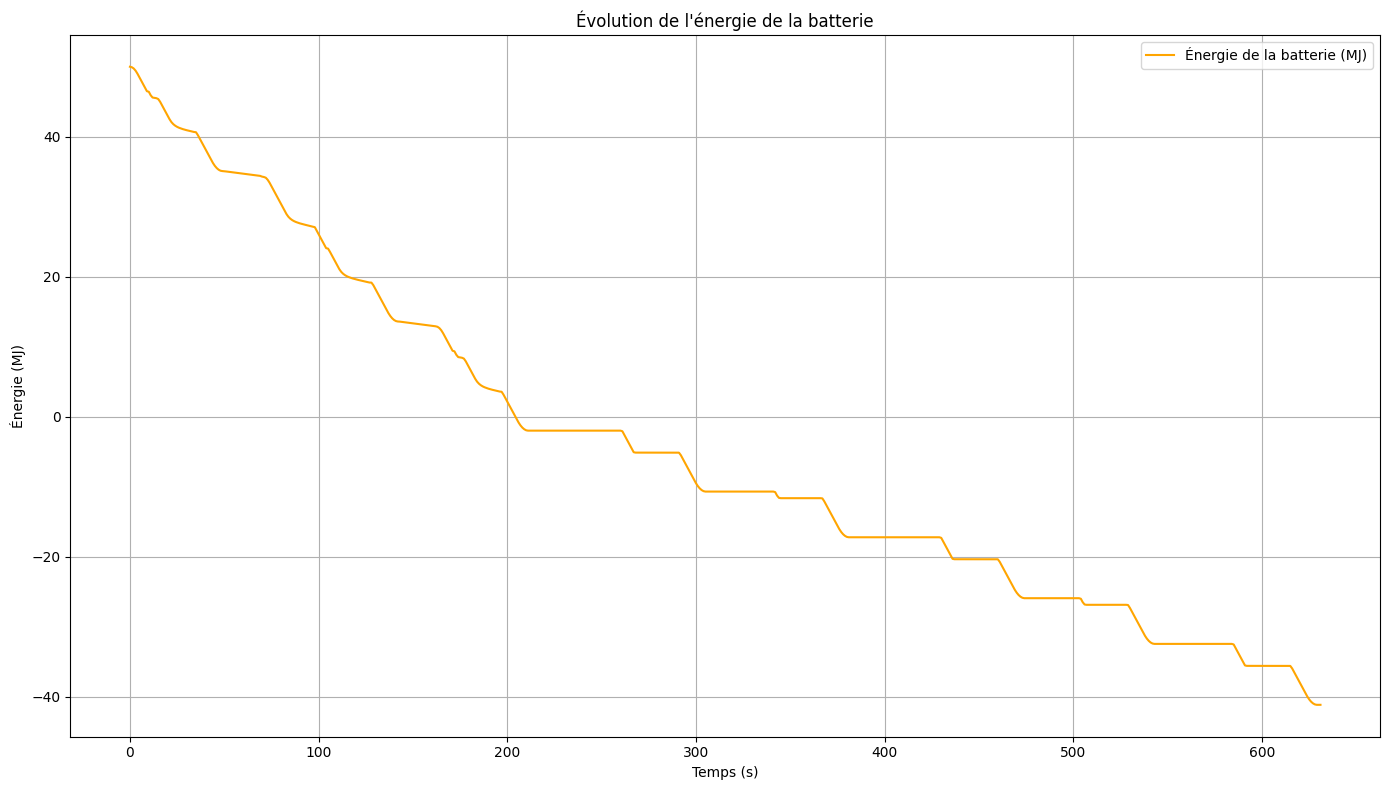

In [ ]:
# --- Simulation avec batterie ---
V_train_with_batt = []
E_batt_history = [E_batt]
P_LAC=0
for i in range(len(temps)):
    # Résistances des segments de LAC et rail
    R_LAC1 = rho_LAC * position[i]  # Jusqu'au train
    R_LAC2 = rho_LAC * (5000 - position[i])  # Après le train
    R_rail1 = rho_rail * position[i]
    R_rail2 = rho_rail * (5000 - position[i])
    
    # Résistance équivalente (Req)
    R_eq = 1 / (1 / R_eq1 + 1 / R_eq2)
    
    if(i==0):
        pass
    else:
        # Répartition de la puissance
        if P_train[i] > 0:  # Train consomme
            if E_batt > 0:  # Batterie disponible
                P_batt = min(P_batt_max, P_train[i], E_batt / (temps[i] - temps[i-1])) 
            else:
                P_batt = 0
            P_LAC = P_train[i] - P_batt
        else:  # Train freine
            P_batt = min(P_batt_max, -P_train[i], (C_batt - E_batt) / (temps[i] - temps[i-1]))
            P_LAC = 0
        
        # Mise à jour de l'énergie de la batterie
        E_batt -= P_batt * (temps[i] - temps[i-1])
        E_batt_history.append(E_batt)
        
    # Calcul de la tension V_train
    delta = V_sst**2 - 4 * R_eq * P_LAC
    if delta > 0:
        V_train = 0.5 * (V_sst + np.sqrt(delta))
    else:
        V_train = np.nan  # Cas où la tension est impossible      
    V_train_with_batt.append(V_train)

# --- Tracé des résultats ---


# Tensions
plt.figure(7)
plt.figure(figsize=(14, 8))
#plt.plot(t, V_train_no_batt, label="Sans batterie", color="blue")
plt.plot(t, V_train_with_batt, label="Avec batterie", color="green")
plt.axhline(V_sst, color="red", linestyle="--", label="Tension sous-station (V_sst)")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension du train (V_train)")
plt.legend()
plt.grid()

# Énergie de la batterie
plt.figure(6)
plt.figure(figsize=(14, 8))
plt.plot(t, np.array(E_batt_history) / 1e6, label="Énergie de la batterie (MJ)", color="orange")
plt.xlabel("Temps (s)")
plt.ylabel("Énergie (MJ)")
plt.title("Évolution de l'énergie de la batterie")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
